In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from utils import *
from mixture_model import *
%load_ext autoreload
%autoreload 2

#### Declare Variables 

In [2]:
n_states = 5 #number of states in the GMM
n_in = 1 #Number of variables for the radial basis function [s] (decay term)
n_out = 2 # Number of motion variables [xi,x2]

n_data = 200 #length of trajectory
n_samples = 5 #number of demonstrations

#### Load Data 

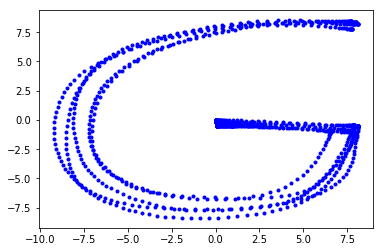

In [165]:
ROOT = 'python_data/2Dletters/'
data = np.load(ROOT + 'G.npy')[:n_samples]

#construct the output Y by concatenating all demonstrations
data = data.transpose([0,2,1])
Y = np.concatenate(data,axis=0)

plt.plot(Y[:,0], Y[:,1],'.b')

In [166]:
from scipy.stats import multivariate_normal as mvn

In [167]:
import numpy as np

#### Fit HMM using full data 

In [169]:
hmm = HMM(D= 2, K=6)

In [170]:
hmm.fit(data,init_type='kbins',n_init = 1,max_iter=40)
clear_output()

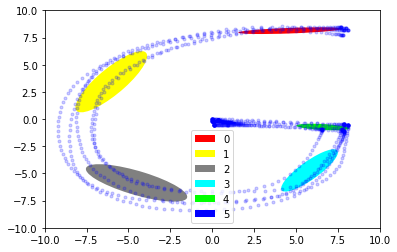

In [171]:
from utils import *

colors = [[1.,0.,0.],[1.,1.,0.],[0.5,0.5,0.5],[0.,1.,1.],[0.,1.,0.],[0.,0.,1.],]

fig,ax = plt.subplots()
plot_GMM(hmm.means_, hmm.covariances_,ax,labels=['0','1','2','3','4','5'],colors=colors)
plt.axis([-10,10,-10,10])
plt.plot(Y[:,0], Y[:,1],'.b',alpha=0.2)
plt.legend()

In [172]:
_,h,_,_,_,_,_ = hmm.compute_messages(hmm.xs[0])

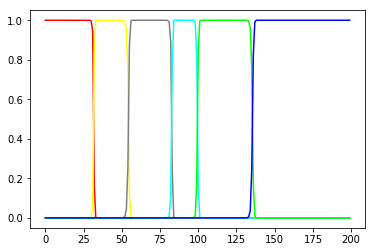

In [173]:
for k in range(hmm.K):
    plt.plot(h[:,k],color=colors[k])

#### Fit HMM using incomplete data 

In [156]:
def subsample(X,N):
    '''Subsample in N iterations the trajectory X. The output is a 
    trajectory similar to X with N points. '''
    nx  = X.shape[0]
    idx = np.arange(float(N))/(N-1)*(nx-1)
    hx  = []
    for i in idx:
        i0 = int(np.floor(i))
        i1 = int(np.ceil(i))
        di = i%1
        x  = X[i0,:]*(1-di) + X[i1,:]*di
        hx.append(x)
    return np.vstack(hx)

In [157]:
data2 = []
for i in range(2):
    data2.append(data[i])
    
for i in range(2,4):
    data2.append(subsample(data[i][100:200,:],200))
    
for i in range(4,5):
    data2.append(subsample(data[i][:100,:],200))

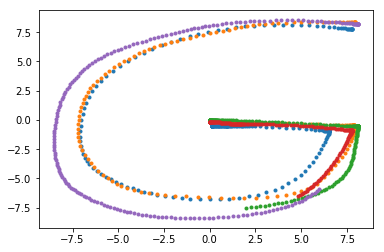

In [161]:
data2 = np.array(data2)
#Y = np.concatenate(data2,axis=0)
for x in data2:
    plt.plot(x[:,0], x[:,1],'.')

In [15]:
hmm = HMM(D= 2, K=6)

In [18]:
hmm.fit(data2,init_type='kmeans',n_init = 1,max_iter=40)
clear_output()

In [162]:
from utils import *
colors = [[1.,0.,0.],[1.,1.,0.],[0.5,0.5,0.5],[0.,1.,1.],[0.,1.,0.],[0.,0.,1.],]

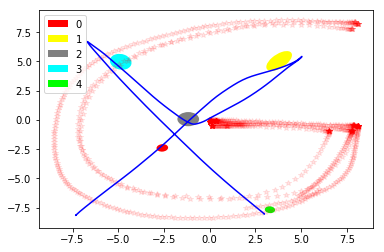

In [163]:
index = 4
_,h,_,_,_,_,_ = hmm.compute_messages(hmm.xs[index])
fig,ax = plt.subplots()
plot_GMM(hmm.means_, hmm.covariances_,ax,labels=['0','1','2','3','4','5'],colors=colors)

plt.plot(Y[:,0],Y[:,1],'*r',alpha=0.1)
plt.plot(hmm.xs[index][:,0], hmm.xs[index][:,1],'b')
plt.legend(loc='best')

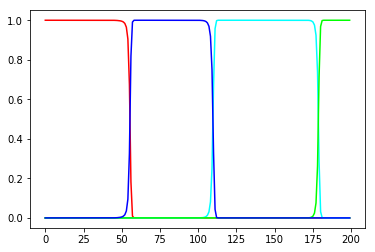

In [42]:
for k in range(hmm.K):
    plt.plot(h[:,k],color=colors[k])

#### Plot HSMM to the data 

In [48]:
hsmm = HSMM(D=Y.shape[1],K=5)
hsmm.fit(data,init_type='kbins')
clear_output()
hsmm.compute_durations(hsmm.xs)

In [49]:
hsmm.edit_trans()

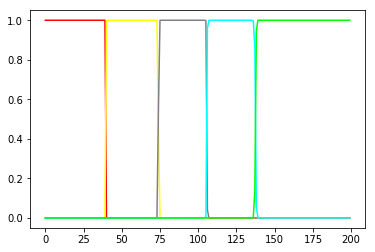

In [54]:
h,_ = hsmm.compute_forward_messages_HSMM(data[0])
for k in range(hsmm.K):
    plt.plot(h[:,k],color=colors[k])

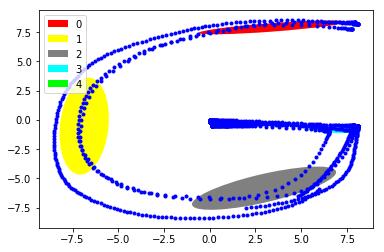

In [58]:
fig,ax = plt.subplots()
plt.plot(Y[:,0], Y[:,1],'.b')
colors = [[1.,0.,0.],[1.,1.,0.],[0.5,0.5,0.5],[0.,1.,1.],[0.,1.,0.],[0.,0.,1.],]

plot_GMM(hsmm.means_,hsmm.covariances_,ax,colors=colors,labels=range(6))
plt.legend()

## Comparing GMM, HMM and HSMM 

#### Load Data 

(5, 200, 4)


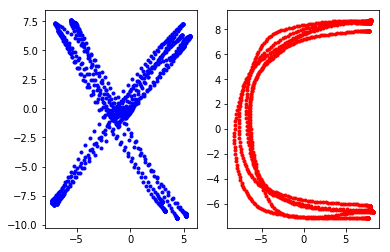

In [61]:
ROOT = 'python_data/2Dletters/'
data_in = np.load(ROOT + 'X.npy')[:5].transpose([0,2,1])
#data_in = np.random.randn(5,200,2)
data_out = np.load(ROOT + 'C.npy')[:5].transpose([0,2,1])
data = np.concatenate([data_in,data_out],axis=2)
print data.shape
#construct the output Y by concatenating all demonstrations
Y = np.concatenate(data,axis=0)

plt.subplot(1,2,1)
plt.plot(Y[:,0], Y[:,1],'.b')
plt.subplot(1,2,2)
plt.plot(Y[:,2], Y[:,3],'.r')

#### Train GMM, HMM and HSMM 

In [62]:
from utils import *

In [107]:
gmm = GMM(D=Y.shape[1],K=5)
gmm.fit(Y,init_type='kbins',max_iter = 50,n_init = 1)
clear_output()

In [108]:
hmm = HMM(D=Y.shape[1],K=5)
hmm.fit(data,init_type='kbins')
clear_output()

In [109]:
hsmm = HSMM(D=Y.shape[1],K=5)
hsmm.fit(data,init_type='kbins')
clear_output()

#### Plot Input

Text(0.5,1,'HSMM')

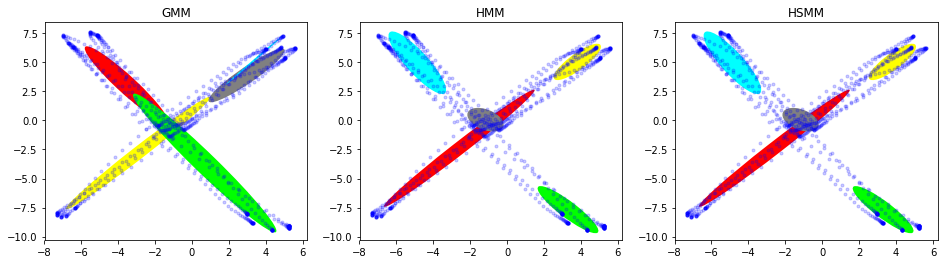

In [110]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

ax[0].plot(Y[:,0], Y[:,1],'.b',alpha=0.2)
plot_GMM(gmm.means_[:,0:2],gmm.covariances_[:,0:2,0:2],ax[0],colors=colors)
ax[0].set_title('GMM')

ax[1].plot(Y[:,0], Y[:,1],'.b',alpha=0.2)
plot_GMM(hmm.means_[:,0:2],hmm.covariances_[:,0:2,0:2],ax[1],colors=colors)
ax[1].set_title('HMM')

ax[2].plot(Y[:,0], Y[:,1],'.b',alpha=0.2)
plot_GMM(hsmm.means_[:,0:2],hsmm.covariances_[:,0:2,0:2],ax[2],colors=colors)
ax[2].set_title('HSMM')

#### Plot Output 

Text(0.5,1,'HSMM')

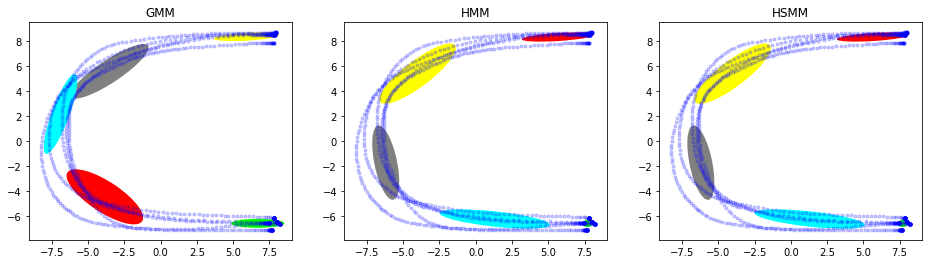

In [111]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

ax[0].plot(Y[:,2], Y[:,3],'.b',alpha=0.2)
plot_GMM(gmm.means_[:,2:],gmm.covariances_[:,2:,2:],ax[0],colors=colors)
ax[0].set_title('GMM')

ax[1].plot(Y[:,2], Y[:,3],'.b',alpha=0.2)
plot_GMM(hmm.means_[:,2:],hmm.covariances_[:,2:,2:],ax[1],colors=colors)
ax[1].set_title('HMM')

ax[2].plot(Y[:,2], Y[:,3],'.b',alpha=0.2)
plot_GMM(hsmm.means_[:,2:],hsmm.covariances_[:,2:,2:],ax[2],colors=colors)
ax[2].set_title('HSMM')

#### GMM conditioning 

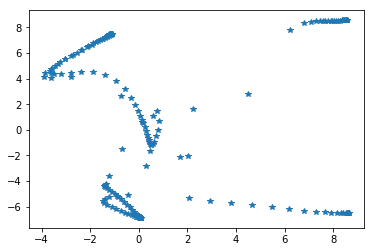

In [112]:
data_pred = []
for x_i in data_in[0]:
    pred,cov = gmm.condition(x_i[None,:],dim_in=slice(0,2),dim_out=slice(2,4))
    data_pred  += [pred]
data_pred = np.asarray(data_pred)
plt.plot(data_pred[:,0],data_pred[:,1],'*')

#### HMM Conditioning 

In [113]:
_,h,_,_,_,_,_ = hmm.compute_messages(data[0])

In [142]:
data_pred = []
#_,h,_,_,_,_,_ = hmm.compute_messages(data_in[0],obs_slice=slice(0,2))
data_pred= hmm.condition(data_in[3],dim_in=slice(0,2),dim_out=slice(2,4))
data_pred = np.asarray(data_pred)
clear_output()

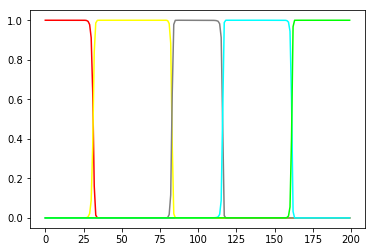

In [143]:
for k in range(hmm.K):
    plt.plot(h[:,k],color=colors[k])

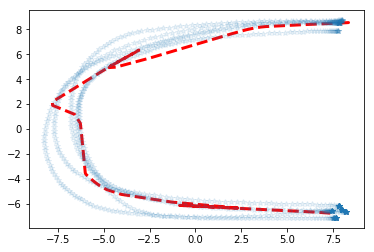

In [144]:
plt.plot(data_pred[:,0],data_pred[:,1],'r--',lw=3)
plt.plot(Y[:,2],Y[:,3],'*',alpha=0.1)

#### HSMM conditioning 

In [118]:
hsmm.compute_durations(hsmm.xs)

In [145]:
hsmm.edit_trans()

In [149]:
data_pred = []
data_pred= hsmm.condition(data_in[2],dim_in=slice(0,2),dim_out=slice(2,4))
data_pred = np.asarray(data_pred)
clear_output()

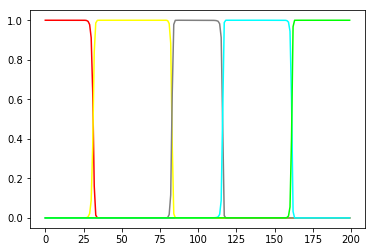

In [150]:
for k in range(hmm.K):
    plt.plot(h[:,k],color=colors[k])

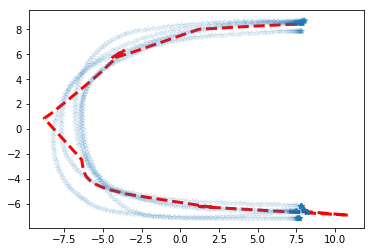

In [151]:
plt.plot(data_pred[:,0],data_pred[:,1],'r--',lw=3)
plt.plot(Y[:,2],Y[:,3],'*',alpha=0.1)